In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.font_manager as fm
my_font = FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns


from IPython.display import Image

In [18]:
Restaurant_Info = pd.read_excel(r"\專案實作\地區餐廳評論分析\Google_Restaurant_Info.xlsx")
Restaurant_Info['STAR_RATING'] = Restaurant_Info['STAR_RATING'].str.replace("星級",'').astype(float)
Restaurant_Info['COMMENTS_COUNT'] = Restaurant_Info['COMMENTS_COUNT'].str.replace(",",'').str.replace('則評論','').astype(int)
Restaurant_Info

,RESTAURANT,LINK,STAR_RATING,COMMENTS_COUNT,MEAL_TYPE,ADDRESS1,ADDRESS2
0,合.shabu ∣ 信義區頂級鍋物,https://www.google.com/maps/place/%E5%90%88.sh...,4.6,3396,涮涮鍋餐廳,"4F, No. 28號松仁路信義區台北市110",NaN
1,Miacucina信義店,https://www.google.com/maps/place/Miacucina%E4...,3.9,2599,素食餐廳,110台北市信義區松壽路11號2樓號,NaN
2,JK STUDIO Modern Asia (原JK STUDIO 新義法料理),https://www.google.com/maps/place/JK+STUDIO+Mo...,4.7,1751,餐廳,110台北市信義區基隆路一段147巷5弄13號,NaN
3,非常泰,https://www.google.com/maps/place/%E9%9D%9E%E5...,4.2,691,泰國餐廳,110台北市信義區松壽路22號,所在地點：Neo 19
4,JOYCE EAST,https://www.google.com/maps/place/JOYCE+EAST/d...,4.3,580,歐洲餐廳,110台北市信義區信義路五段128號,1 樓 · 新光信義傑仕堡
...,...,...,...,...,...,...,...
115,銀座杏子日式豬排-信義威秀店,https://www.google.com/maps/place/%E9%8A%80%E5...,3.9,812,日式炸豬扒餐廳,110台北市信義區松壽路20號2樓,NaN
116,M One Cafe A11館,https://www.google.com/maps/place/M+One+Cafe+A...,4.4,1102,餐廳,110台北市信義區松壽路11號3樓,NaN
117,十二籃 粥火鍋 逸仙店,https://www.google.com/maps/place/%E5%8D%81%E4...,4.3,1222,火鍋餐廳,110台北市信義區逸仙路50巷28號,NaN
118,We&Me Cafe好好文化創意,https://www.google.com/maps/place/We%26Me+Cafe...,4.2,657,咖啡店,110台北市信義區基隆路一段188-2號,NaN


In [19]:
Restaurant_Info['MEAL_TYPE'].value_counts()

MEAL_TYPE
泰國餐廳            9
餐廳              8
台灣餐廳            7
意大利餐廳           7
中餐館             6
美式餐廳            5
火鍋餐廳            5
涮涮鍋餐廳           4
自助餐餐廳           4
日本餐廳            4
美式牛扒屋           4
鐵板燒餐廳           3
新加坡餐廳           3
滬菜館             3
日式燒肉餐廳          3
四川酒家            3
酒樓              3
西餐廳             3
中式麵食店           2
湘菜館             2
歐洲餐廳            2
日式炸豬扒餐廳         2
咖啡店             2
純素餐廳            1
餃子店             1
拉麵店             1
漢堡餐廳            1
酒吧雅座            1
印度餐廳            1
韓國餐廳            1
港式快餐店           1
小餐館 (Bistro)    1
早午餐餐廳           1
薄餅餐廳            1
現代印度餐廳          1
現代美式餐廳          1
夏威夷餐廳           1
海鮮丼餐廳           1
懷石料理餐廳          1
美式扒房            1
現代法國餐廳          1
素食餐廳            1
日式咖哩餐廳          1
法國餐廳            1
馬來西亞餐廳          1
越式河粉餐廳          1
壽喜燒和日式火鍋餐廳      1
韓式燒烤餐廳          1
天婦羅丼餐廳          1
Name: count, dtype: int64

In [20]:
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(日本|日式|懷石|天婦羅|拉麵).*','日式料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(美式|夏威夷).*','美式料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(火鍋|涮涮鍋).*','火鍋類料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(中餐|中式|湘菜|四川|滬).*','中式料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(港式|酒樓).*','港式料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(印度).*','印度料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(韓國|韓式).*','韓式料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(法國|法式).*','法式料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(素).*','素食料理餐廳',regex=True)
Restaurant_Info['MEAL_TYPE'] = Restaurant_Info['MEAL_TYPE'].str.replace(r'.*(越式|馬來西亞|泰國|泰式|新加坡).*','東南亞料理餐廳',regex=True)

# Restaurant_Info.to_excel(r"\專案實作\地區餐廳評論分析\data_processed\google_restaurant_info_Tableau.xlsx")
Restaurant_Info

,RESTAURANT,LINK,STAR_RATING,COMMENTS_COUNT,MEAL_TYPE,ADDRESS1,ADDRESS2
0,合.shabu ∣ 信義區頂級鍋物,https://www.google.com/maps/place/%E5%90%88.sh...,4.6,3396,火鍋類料理餐廳,"4F, No. 28號松仁路信義區台北市110",NaN
1,Miacucina信義店,https://www.google.com/maps/place/Miacucina%E4...,3.9,2599,素食料理餐廳,110台北市信義區松壽路11號2樓號,NaN
2,JK STUDIO Modern Asia (原JK STUDIO 新義法料理),https://www.google.com/maps/place/JK+STUDIO+Mo...,4.7,1751,餐廳,110台北市信義區基隆路一段147巷5弄13號,NaN
3,非常泰,https://www.google.com/maps/place/%E9%9D%9E%E5...,4.2,691,東南亞料理餐廳,110台北市信義區松壽路22號,所在地點：Neo 19
4,JOYCE EAST,https://www.google.com/maps/place/JOYCE+EAST/d...,4.3,580,歐洲餐廳,110台北市信義區信義路五段128號,1 樓 · 新光信義傑仕堡
...,...,...,...,...,...,...,...
115,銀座杏子日式豬排-信義威秀店,https://www.google.com/maps/place/%E9%8A%80%E5...,3.9,812,日式料理餐廳,110台北市信義區松壽路20號2樓,NaN
116,M One Cafe A11館,https://www.google.com/maps/place/M+One+Cafe+A...,4.4,1102,餐廳,110台北市信義區松壽路11號3樓,NaN
117,十二籃 粥火鍋 逸仙店,https://www.google.com/maps/place/%E5%8D%81%E4...,4.3,1222,火鍋類料理餐廳,110台北市信義區逸仙路50巷28號,NaN
118,We&Me Cafe好好文化創意,https://www.google.com/maps/place/We%26Me+Cafe...,4.2,657,咖啡店,110台北市信義區基隆路一段188-2號,NaN


In [45]:
# Restaurant_Info.to_excel(r"\專案實作\地區餐廳評論分析\Restaurant_Data_Tableau.xlsx")

In [9]:
Restaurant_top_20_comments = Restaurant_Info[Restaurant_Info['COMMENTS_COUNT'] >= (Restaurant_Info['COMMENTS_COUNT'].nlargest(20).min())].sort_values(by='COMMENTS_COUNT',ascending=False).copy()

# Restaurant_top_20_comments.to_excel(r"\專案實作\地區餐廳評論分析\data_processed\restaurant_top20_comments.xlsx")
Restaurant_top_20_comments

,RESTAURANT,LINK,STAR_RATING,COMMENTS_COUNT,MEAL_TYPE,ADDRESS1,ADDRESS2
52,鼎泰豐 101店,https://www.google.com/maps/place/%E9%BC%8E%E6...,4.5,10185,台灣餐廳,110台北市信義區市府路45號B1,所在地點：台北101購物中心
32,INPARADISE 饗饗 信義店,https://www.google.com/maps/place/INPARADISE+%...,4.2,9565,自助餐餐廳,110台北市信義區忠孝東路五段68號微風信義46樓,46 樓 · 微風信義
50,艾朋牛排餐酒館 À POINT STEAK & BAR,https://www.google.com/maps/place/%E8%89%BE%E6...,4.6,6766,美式料理餐廳,110台北市信義區忠孝東路五段139號2樓,NaN
12,旭集 和食集錦 信義店,https://www.google.com/maps/place/%E6%97%AD%E9...,4.1,5486,自助餐餐廳,110台北市信義區松仁路58號信義A13 大遠百 9樓,9 樓 · 遠東百貨 信義A13
51,欣葉日本料理信義店,https://www.google.com/maps/place/%E6%AC%A3%E8...,4.1,5263,日式料理餐廳,110台北市信義區松壽路11號5樓,所在地點：新光三越 台北信義新天地A11
97,台北君悅酒店 凱菲屋 Café,https://www.google.com/maps/place/%E5%8F%B0%E5...,4.0,5057,自助餐餐廳,110台北市信義區松壽路2號1樓,1 樓 · 台北君悅酒店
64,饗食天堂 台北信義店,https://www.google.com/maps/place/%E9%A5%97%E9...,4.2,5009,自助餐餐廳,NaN,6 樓 · ATT 4 FUN 信義店
25,French Windows British Teahouse 琺蘭綺瑥朵英式茶餐館,https://www.google.com/maps/place/French+Windo...,4.8,4872,歐洲餐廳,110台北市信義區忠孝東路四段553巷22弄51-1號,NaN
103,海底撈火鍋 信義店,https://www.google.com/maps/place/%E6%B5%B7%E5...,4.5,4572,火鍋類料理餐廳,110台北市信義區松壽路12號6樓,NaN
28,點點心 信義形象店,https://www.google.com/maps/place/%E9%BB%9E%E9...,4.1,4570,港式料理餐廳,110台北市信義區忠孝東路五段68號微風信義B1,所在地點：微風信義


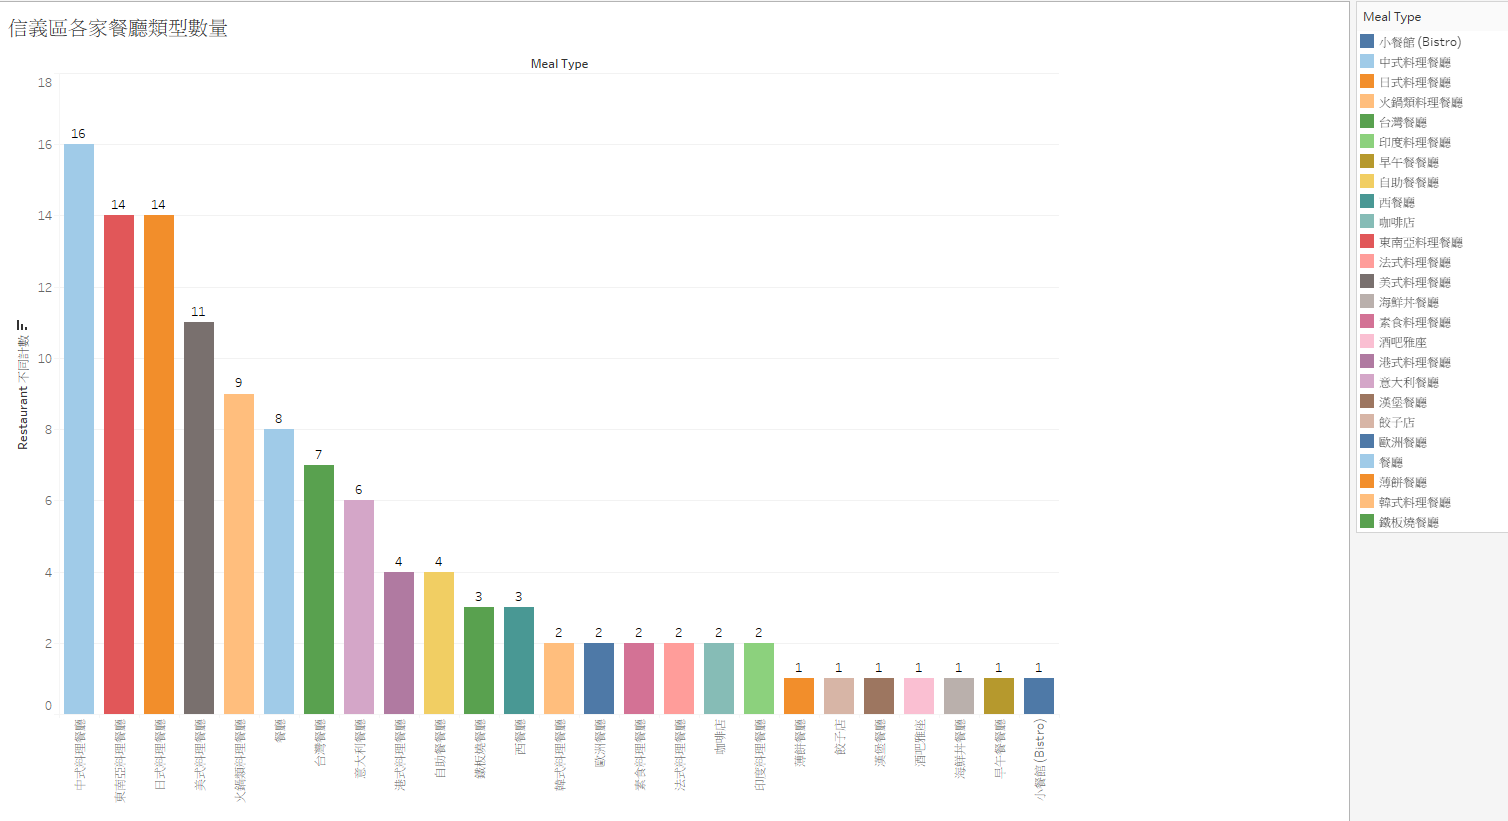

In [21]:
Image(r"\專案實作\地區餐廳評論分析\data_plot\信義區各家餐廳類型數量.png")

### 信義區各家餐廳類型數量
- 各類型餐廳數排名
  1. 中式料理餐廳:16 間
  2. 東南亞料理餐廳:14 間
  3. 日式料理餐廳:14 間
  4. 美式料理餐廳:11 間
  5. 火鍋類料理餐廳:9 間
  6. 餐廳(沒有明確歸類):8 間
  7. 台灣餐廳:7 間
  8. 義大利餐廳:6 間
  9. 港式料理餐廳:4 間
  10. 自助餐(吃到飽 buffet):4 間

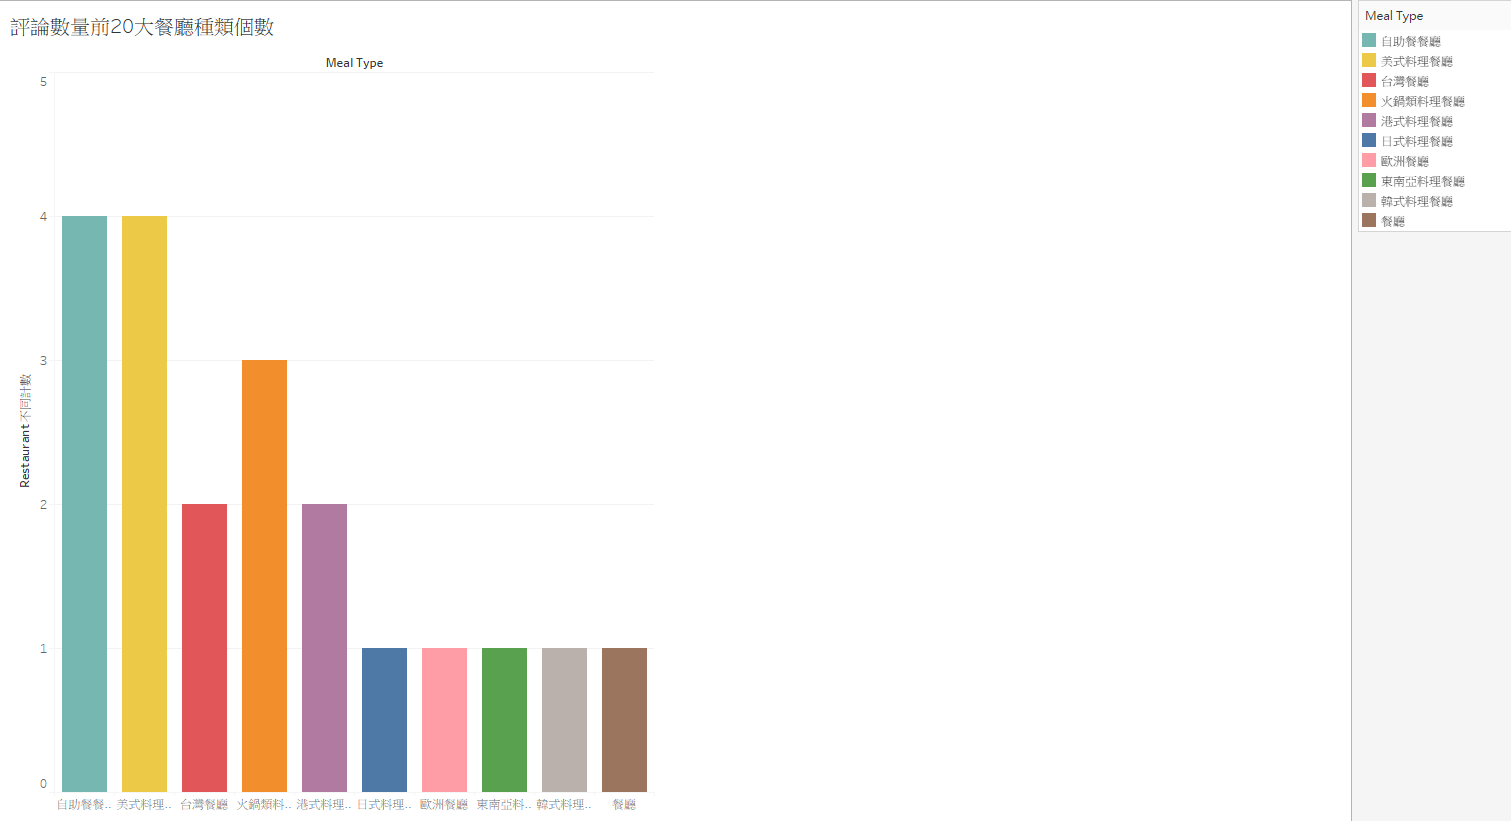

In [15]:
Image(r"\專案實作\地區餐廳評論分析\data_plot\評論數量前20大餐廳種類個數.png")

- 評論數量前20大餐廳種類個數中出現最多的餐廳種類為
    - 自助餐廳:4 間 信義區總間數:4 間 100%
    - 美式料理:4 間 信義區總間數:11 間 36.36%
    - 火鍋類:3 間 信義區總間數:9 間 33.33%
    - 台灣餐廳:2 間 信義區總間數:7 間 28.57%
    - 港式餐廳:2 間 信義區總間數:4 間 50%

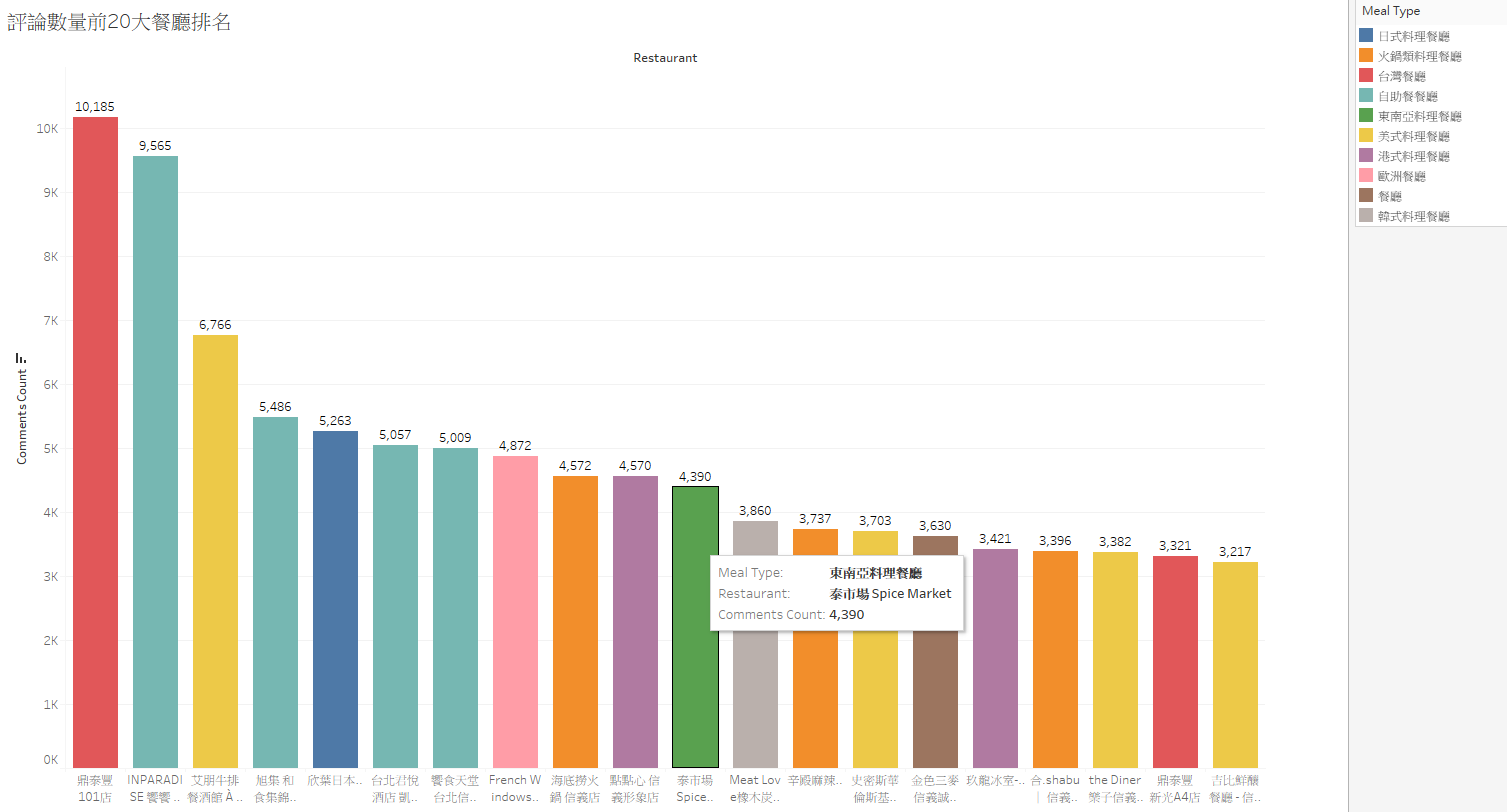

In [16]:
Image(r"\專案實作\地區餐廳評論分析\data_plot\評論數量前20大餐廳排名.png")

### 評論數前20大餐廳的累積評論數量排名
    - 最高的是鼎泰豐(台灣餐廳)
    - 之後評論數最高的餐廳前幾家餐廳自助餐類型的餐廳較多、接著是美式餐廳
    
### 評論數量多的可能原因
    - 餐廳知名度高、熱門
    - 該地區這類型餐廳較受到消費者青睞
    - 留言評論提供優惠或贈品，有些評論消費者並未寫下留言僅留下星級打分(google評論五星送XX小菜等等活動)
    - 餐廳產品、服務、環境等等方面有缺點導致消費者無法忍受而留下評論
    - 開業經營時間較久



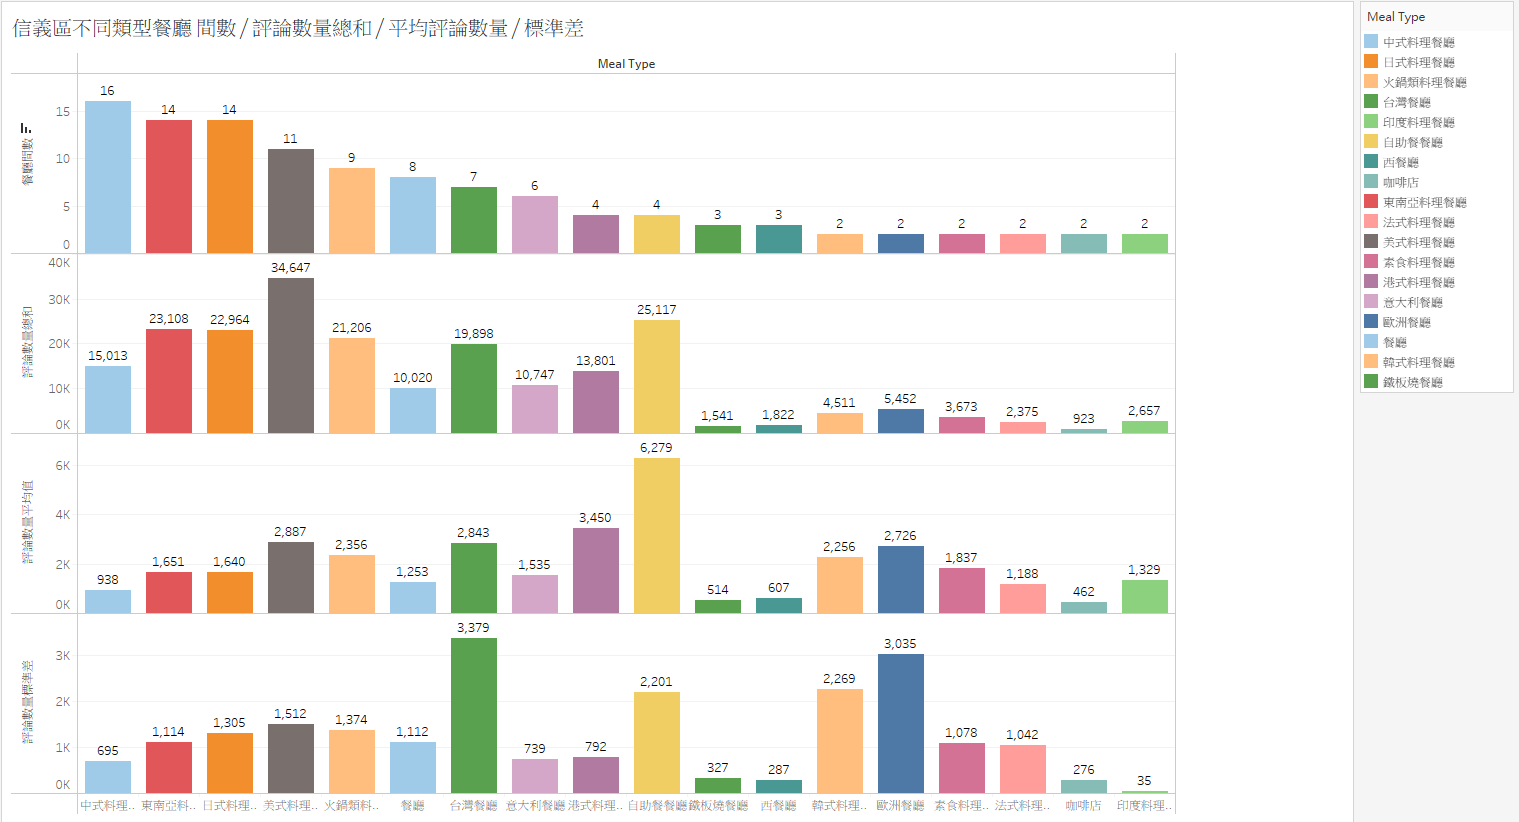

In [36]:
Image(r"\專案實作\地區餐廳評論分析\data_plot\信義區不同餐廳 間數&評論數量總和&平均評論數量&標準差.png")

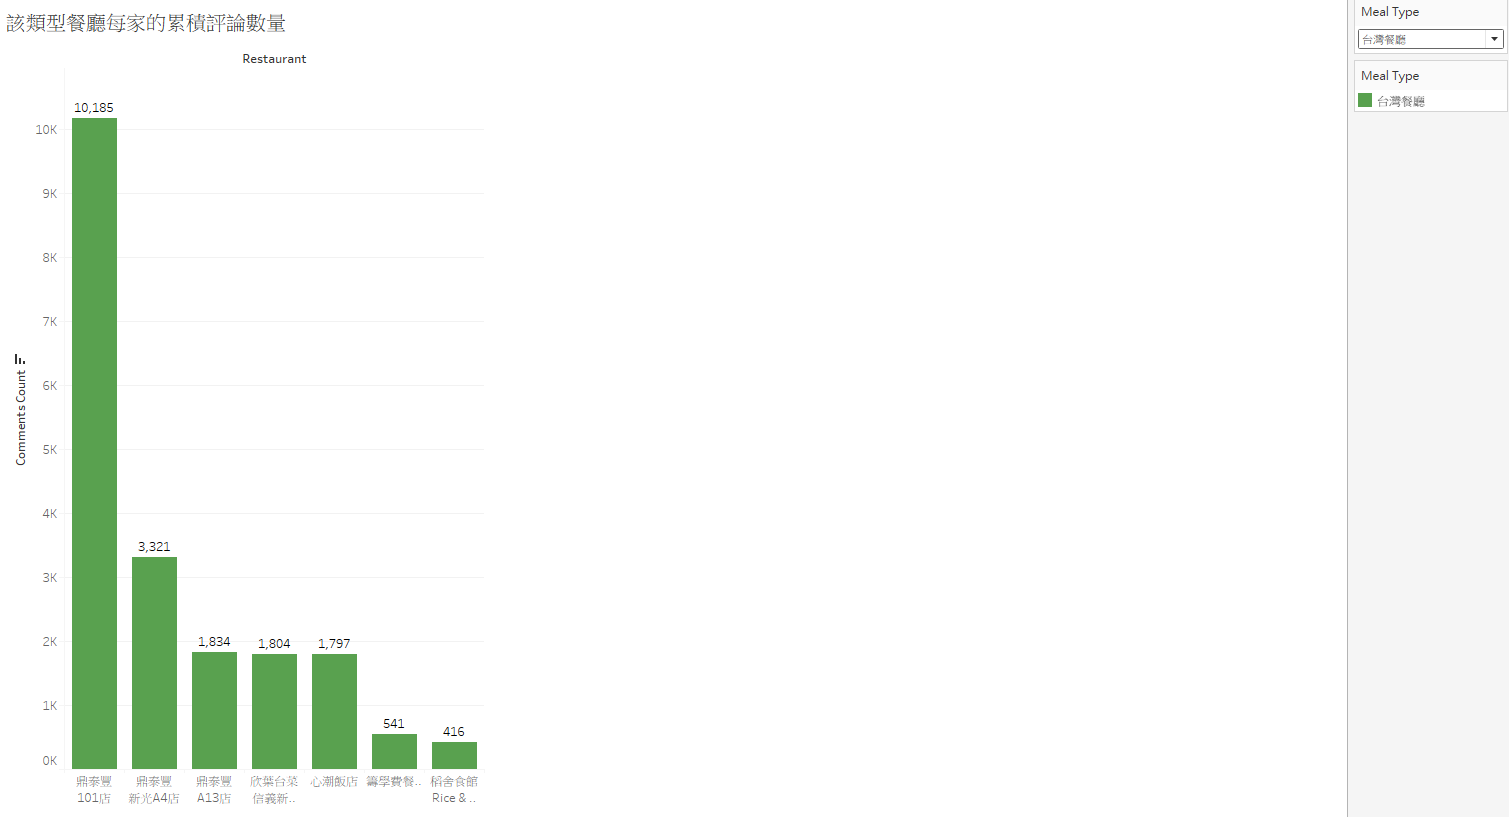

In [37]:
Image(r"\專案實作\地區餐廳評論分析\data_plot\台灣餐廳各家評論數量.png")

### 資料對比分析
- 自助餐類型的餐廳在信義區有 4間且它們的累積評論數量都不少；而港式餐廳在信義區有 4間，其中有兩間評論數有前20名加上平均評論數量算高(僅次自助餐)且評論數量標準差相對小代表不同家餐廳之間的評論數量相差不大，這兩類餐廳在信義區應該是較熱門
- 美式餐廳、火鍋類餐廳兩種類型餐廳在信義區的店數量都不少，評論數量整體蠻多且評論數量標準差相對小代表不同家餐廳之間的評論數量相差不大，這兩類餐廳在信義區應是較熱門

- 台灣餐廳在信義區也有7家而且評論數總和以及評論數量平均值都蠻高，但是台灣餐廳的評論數量標準差相對平均值非常大，如果直接觀察台灣餐廳每一家的累積評論數量圖表可發現最多的前三家都是鼎泰豐的不同分店而且101店就超過1萬則，所以在台灣餐廳中應該主要分析鼎泰豐

- 中式料理餐廳、東南亞料理、日式料理等等這些類型餐廳在信義區間數多，不過累積的評論數量不多，同時觀察這些餐廳的評論數量總和的平均值以及標準差可推論該類型餐廳不同家之間的評論數量相差的不算太大(相對於台灣餐廳、歐洲料理、韓式，這些類型的不同家之間的評論數量就差很多)

### 備註
- 評論數量高不一定代表該餐廳真的品質很好非常吸引人，有可能是透過做活動、行銷公司操作等等方式把評論數量和星級拉起來具體這間餐廳品質如何還是要通過評論中的留言內容來分析才能得出它哪裡好以及哪裡不好
- 該地區的某個類別的餐廳整體評論數量高代表許多人會選擇到該地區的這類型餐廳用餐，能算是比較熱門不過同樣評論數量高不一定因為熱門所以都是好評，其中也可能是因為有一些較大的缺點導致抱怨的消費者多，也需要從留言內容去分析是因為那些優勢讓這些餐廳熱門、或者那些缺點應該改進
- 某類型的餐廳數量多且評論數量高可以判斷該餐廳在這地方雖熱門但競爭同時也較大(因為同類型選擇多)，這種情況可以從評論留言內容分析找出好的優勢點在哪裡以及缺點在哪裡，得到該從何下手將優勢放到最大同時避免缺點，簡言之可以從留言資訊中得到在這地區的消費者在乎什麼

## 圖表連結 - https://public.tableau.com/views/google_16938125428450/1?:language=zh-TW&publish=yes&:display_count=n&:origin=viz_share_link